In [16]:
# Importing libraries

import numpy as np
import pandas as pd
import urllib.request

import matplotlib.pyplot as plt # plotting library
import seaborn as sns

import robustocs as rocs
from robustocs import utils
from robustocs import pedigree


In [3]:
# Importing data

# load in the problem variables
sigma, mubar, omega, n, _, _, _ = rocs.load_problem(
    sigma_filename="../data/A50.txt",
    mu_filename="../data/EBV50.txt",
    omega_filename="../data/S50.txt",
    issparse=True
)

file_path = "../data/SEX50.txt"

# Load the file while treating it as a text-based dataset
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

kin = sigma/2

/var/folders/yh/0bk27b457hb862b_2wsrctcr0000gr/T/ipykernel_42836/3244010030.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


Hasta aqui ya sabemos que existen diferentes metodos de selección selección truncada, selección optima y ahora proponemos selección robusta.

# Truncation selection

Truncation selection is known to be the most efficient form of directional selection (Kimura, xxx). With this metodology the best individuals from a population are selected for reproduction. However, in this was usually maximized genetic gain with no or an implicit limitations of rates of inbreeding.  

For truncation selection, individuals are ranked based on the EBV, then only the best are choosen as parent for the next generation. 

![Example Image](../images/truncation.png)


In [4]:
# Parameters

sires = range(0, n, 2)
dams = range(1, n, 2)

# Max contributions definition

# upper
upper = np.zeros(n)
upper[::2] = 0.5  
upper[1::2] = 0.02 

# lower
lower = np.zeros(n)
lower[::2] = 0.0  
lower[1::2] = 0.02  


lam = 0
kap = 0

In [5]:
# Model

w_truncation, z_truncation, obj_truncation = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=kap, dimension=n, upper_bound=upper, lower_bound=lower)

Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Hessian has dimension 50 but no nonzeros, so is ignored


In [7]:
# Statistics truncation

# Expected genetic gain
genetic_gain_sel_truncation = utils.expected_genetic_merit(w_truncation, mubar)

# Expected group coancestry
group_coancestry_sel_truncation = utils.group_coancestry(w_truncation,sigma)

# Expected grouo uncertainty
group_uncertainty_truncation = z_truncation


print("Expected genetic gain:", genetic_gain_sel_truncation)
print("Expected group coancestry:", group_coancestry_sel_truncation)
print("Expected group uncertainty:", group_uncertainty_truncation)

Expected genetic gain: 2.043087959504886
Expected group coancestry: 0.3153644973754871
Expected group uncertainty: 0.25044569048135296


# Conservation



In [8]:
# Parameters

sires = range(0, n, 2)
dams = range(1, n, 2)

# Max contributions definition

# upper
upper = np.zeros(n)
upper[::2] = 0.5  
upper[1::2] = 0.02 

# lower
lower = np.zeros(n)
lower[::2] = 0.0  
lower[1::2] = 0.02  


lam = 1001
kap = 0

In [9]:
# Model

w_conservation, z_conservation, obj_conservation = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=kap, dimension=n, upper_bound=upper, lower_bound=lower)

Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms


In [10]:
# Statistics conservation

# Expected genetic gain
genetic_gain_sel_conservation = utils.expected_genetic_merit(w_conservation, mubar)

# Expected group coancestry
group_coancestry_sel_conservation = utils.group_coancestry(w_conservation,sigma)

# Expected grouo uncertainty
group_uncertainty_conservation = z_conservation


print("Expected genetic gain:", genetic_gain_sel_conservation)
print("Expected group coancestry:", group_coancestry_sel_conservation)
print("Expected group uncertainty:", group_uncertainty_conservation)

Expected genetic gain: 1.8379354183142913
Expected group coancestry: 0.08680096427530473
Expected group uncertainty: 0.09425649413337275


# uncertainty


In [11]:
# Parameters

sires = range(0, n, 2)
dams = range(1, n, 2)

# Max contributions definition

# upper
upper = np.zeros(n)
upper[::2] = 0.5  
upper[1::2] = 0.02 

# lower
lower = np.zeros(n)
lower[::2] = 0.0  
lower[1::2] = 0.02  


lam = 0
kap = 100

In [12]:
# Model

w_uncertainty, z_uncertainty, obj_uncertainty = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=kap, dimension=n, upper_bound=upper, lower_bound=lower)

Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Hessian has dimension 50 but no nonzeros, so is ignored


In [13]:
# Statistics uncertainty

# Expected genetic gain
genetic_gain_sel_uncertainty = utils.expected_genetic_merit(w_uncertainty, mubar)

# Expected group coancestry
group_coancestry_sel_uncertainty = utils.group_coancestry(w_uncertainty,sigma)

# Expected grouo uncertainty
group_uncertainty_uncertainty = z_uncertainty


print("Expected genetic gain:", genetic_gain_sel_uncertainty)
print("Expected group coancestry:", group_coancestry_sel_uncertainty)
print("Expected group uncertainty:", group_uncertainty_uncertainty)

Expected genetic gain: 1.8635800512880005
Expected group coancestry: 0.08877838890695486
Expected group uncertainty: 0.09214842458824989


In [15]:
df['w_truncation'] = w_truncation
df['w_conservation'] = w_conservation
df['w_uncertainty'] = w_uncertainty

# Rename all columns
df.columns = ["idd", "sex", "w_truncation", "w_conservation", "w_uncertainty"]

print(df.head())

     idd sex  w_truncation  w_conservation  w_uncertainty
0  11951   M          0.00        0.018201       0.017095
1  11952   F          0.02        0.020000       0.020000
2  11953   M         -0.00        0.012828       0.026790
3  11954   F          0.02        0.020000       0.020000
4  11955   M          0.00        0.018671       0.015184


In [ ]:
df_male = df[df["sex"] == "M"]
df_male.head()

0     True
1    False
2     True
3    False
4     True
Name: sex, dtype: bool

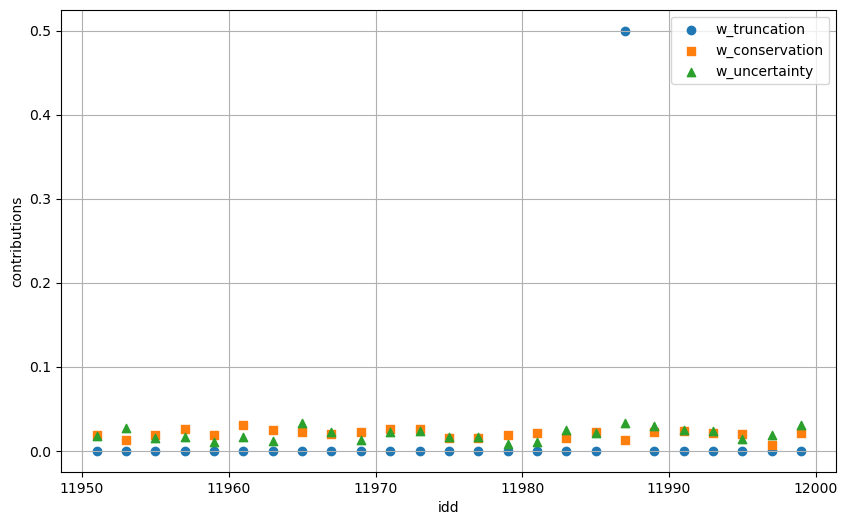

In [23]:

plt.figure(figsize=(10, 6))

df_male = df[df["sex"] == "M"]

plt.scatter(df_male["idd"], df_male["w_truncation"], label="w_truncation", marker="o")
plt.scatter(df_male["idd"], df_male["w_conservation"], label="w_conservation", marker="s")
plt.scatter(df_male["idd"], df_male["w_uncertainty"], label="w_uncertainty", marker="^")

plt.xlabel("idd")
plt.ylabel("contributions")
plt.legend()
plt.grid(True)
plt.show()